Dima's Part


---

# Report: VADER Sentiment Analysis in *Crime and Punishment*

## 1. Introduction

Sentiment analysis identifies the emotional tone of text. VADER (Valence Aware Dictionary and sEntiment Reasoner) is a **lexicon- and rule-based tool** from NLTK that scores text as positive, negative, or neutral, producing a **compound score** between -1 (most negative) and +1 (most positive).

---

## 2. How VADER Works

1. **Lexicon-based scoring:** Each word has a valence score from -4 to +4.
2. **Modifiers & context:** Handles negations, intensity words (e.g., “very”), punctuation, and capitalization.
3. **Aggregation:** Combines positive, negative, and neutral scores into a **compound score** representing overall sentiment.

Example:

```python
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
sia.polarity_scores("I absolutely love this book!")
# Output: {'neg': 0.0, 'neu': 0.37, 'pos': 0.63, 'compound': 0.875}
```

---

## 3. Application to *Crime and Punishment*

VADER is well-suited for novels because it:

* Provides **chapter-level sentiment**, revealing emotional arcs.
* Captures **Raskolnikov’s complex moods**, including guilt, despair, and relief.
* Works without needing labeled training data, making it ideal for **literary texts**.

By analyzing each chapter’s sentiment, we can **visualize Raskolnikov’s psychological journey**, highlighting peaks of tension, remorse, and redemption.

---

## 4. Conclusion

VADER offers a **fast, interpretable, and effective** way to quantify emotions in literature. In *Crime and Punishment*, it allows us to trace Raskolnikov’s inner struggles and emotional evolution across the story.

---



Most Positive Sentence:
Of course, there is no
great love either on his side, or on hers, but Dounia is
a clever girl and has the heart of an angel, and will
make it her duty to make her husband happy who on
his side will make her happiness his care.
Sentiment Score: 0.9744 

Most Negative Sentence:
Sonia flushed crimson, and Katerina
Ivanovna suddenly burst into tears, immediately
observing that she was “nervous and silly, that she
was too much upset, that it was time to finish, and
as the dinner was over, it was time to hand round
the tea.”
   At that moment, Amalia Ivanovna, deeply
aggrieved at taking no part in the conversation, and
not being listened to, made one last effort, and with
secret misgivings ventured on an exceedingly deep
and weighty observation, that “in the future board-
ing-school she would have to pay particular attention
to die Wäsche, and that there certainly must be a good
Dame to look after the linen, and secondly that the
young ladies must not novels at night 

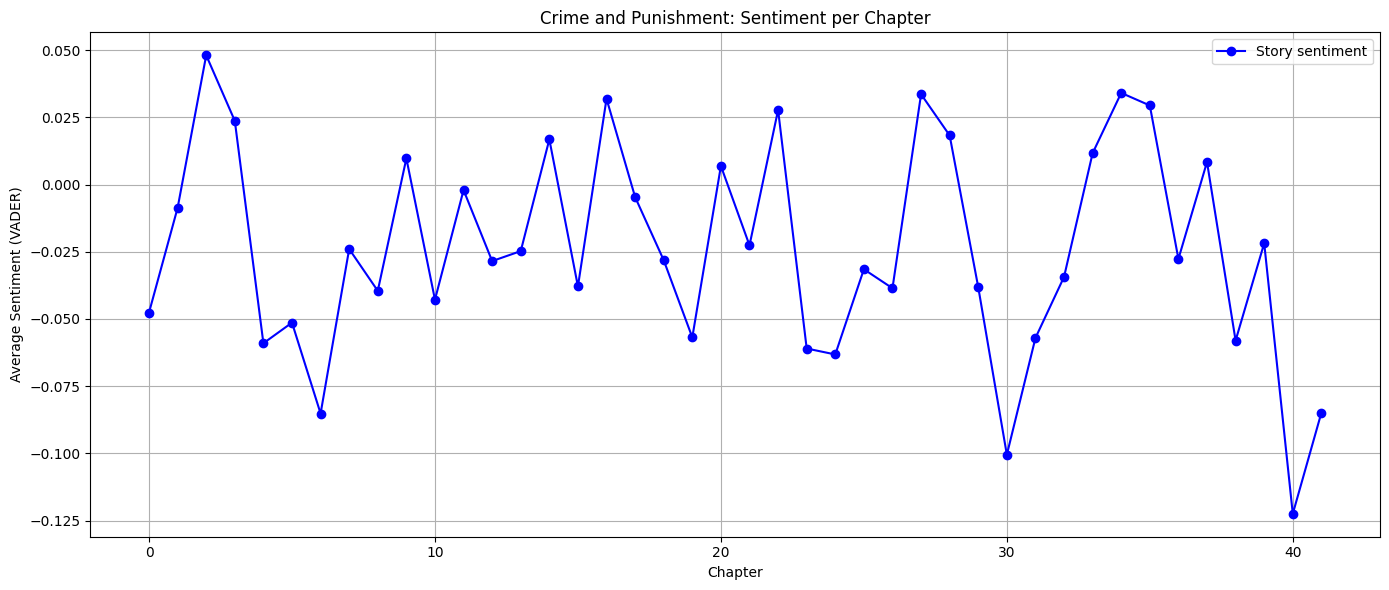

In [16]:
from pathlib import Path
import re
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# nltk.download('vader_lexicon')
nltk.download('vader_lexicon', quiet=True)
sia = SentimentIntensityAnalyzer()

# ------------------ LOAD & PREPROCESS ------------------
def load_text(file_path: str):
    p = Path(file_path)
    if not p.exists():
        raise FileNotFoundError(f"❌ File not found: {p}")
    return p.read_text(encoding='utf-8', errors='ignore')

def normalize(text: str) -> str:
    return text.replace('\r\n', '\n')

def split_sentences(text: str):
    return [s.strip() for s in re.split(r'(?<=[.!?])\s+', text) if s.strip()]

# ------------------ SENTIMENT ------------------
def compute_sentiment(sentences):
    return [sia.polarity_scores(s)['compound'] for s in sentences]

def aggregate_chapter_sentiment(sentences, chapter_marker="CHAPTER"):
    chapter_scores = []
    current = []

    for s in sentences:
        if chapter_marker.lower() in s.lower():
            if current:
                avg_sentiment = sum(compute_sentiment(current)) / len(current)
                chapter_scores.append(avg_sentiment)
            current = []
        else:
            current.append(s)

    if current:
        avg_sentiment = sum(compute_sentiment(current)) / len(current)
        chapter_scores.append(avg_sentiment)

    return chapter_scores

# ------------------ FILE ------------------
Crime_file = r"..\data\Crime-punishment.txt"
crime_text = normalize(load_text(Crime_file))
crime_sentences = split_sentences(crime_text)

# ------------------ ANALYSIS ------------------
cp_sentiments = aggregate_chapter_sentiment(crime_sentences, chapter_marker="CHAPTER")

# Find the most positive and most negative sentences
sentence_scores = [(s, sia.polarity_scores(s)['compound']) for s in crime_sentences]
most_positive = max(sentence_scores, key=lambda x: x[1])
most_negative = min(sentence_scores, key=lambda x: x[1])

print("Most Positive Sentence:")
print(most_positive[0])
print("Sentiment Score:", most_positive[1], "\n")

print("Most Negative Sentence:")
print(most_negative[0])
print("Sentiment Score:", most_negative[1], "\n")

# ------------------ PLOT ------------------
plt.figure(figsize=(14, 6))
plt.plot(cp_sentiments, label="Story sentiment", color='blue', marker='o')
plt.xlabel("Chapter")
plt.ylabel("Average Sentiment (VADER)")
plt.title("Crime and Punishment: Sentiment per Chapter")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Using JSON: Character Library\Crime_punishment.json
Using text: ..\data\Crime-punishment.txt

Raskolnikov aliases (preview): ['Raskolnikov', 'Rodion Romanovich Raskolnikov', 'Rodion Romanovich', 'Rodion', 'Rodya', 'Rodka', 'Rodenka', 'the student', 'the young man', 'the lodger'] ...

Total sentences in book: 16927
Content sentences (without CHAPTER markers): 16885
Number of chapters detected: 42

Sentences mentioning Raskolnikov: 1002
First 3 Raskolnikov sentences:
- And each time he passed,
the young man had a sick, frightened feeling,
which made him scowl and feel ashamed.
- An expression of the profoundest disgust
gleamed for a moment in the young man’s refined
face.
- And yet
when a drunken man who, for some unknown rea-
son, was being taken somewhere in a huge waggon
dragged by a heavy dray horse, suddenly shouted at
him as he drove past: “Hey there, German hatter”
bawling at the top of his voice and pointing at him —
the young man stopped suddenly and clutched
tremulously at his 

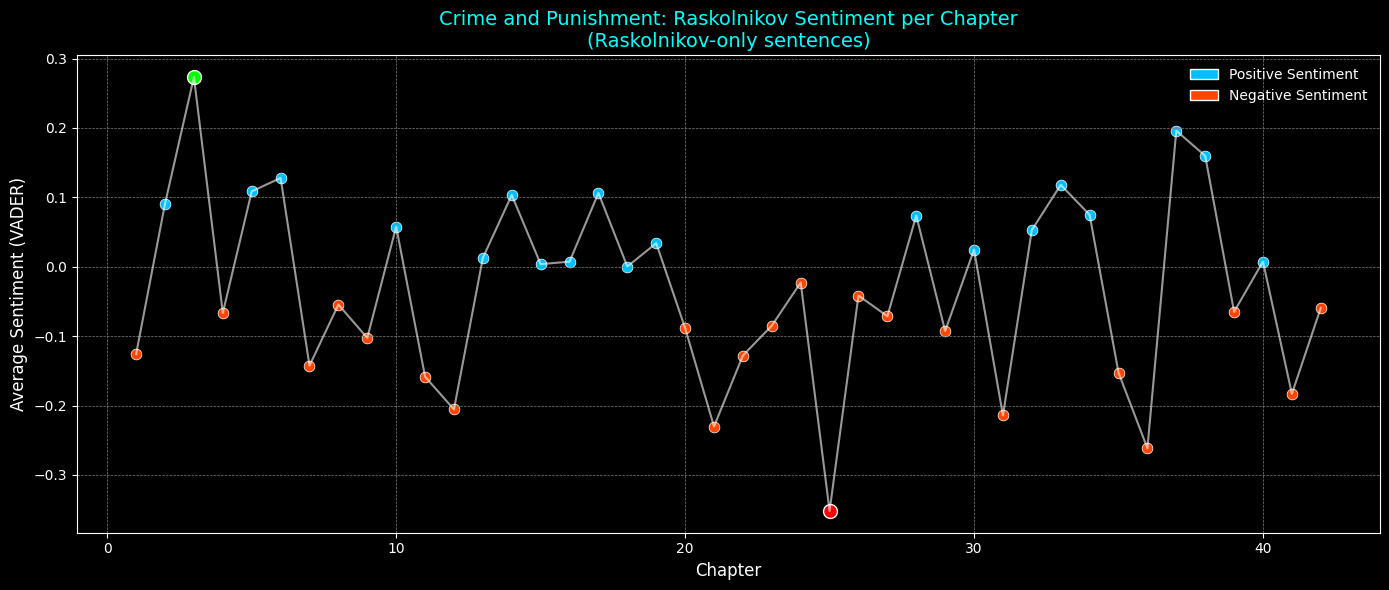

In [2]:
from pathlib import Path
import json
import re
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# ------------------ PATHS ------------------
JSON_PATH = Path("Character Library/Crime_punishment.json")
TEXT_PATH = Path("../data/Crime-punishment.txt")

print("Using JSON:", JSON_PATH)
print("Using text:", TEXT_PATH)

# ------------------ LOAD JSON & ALIASES ------------------
if not JSON_PATH.exists():
    raise FileNotFoundError(f"❌ JSON file not found: {JSON_PATH}")

with JSON_PATH.open(encoding="utf-8") as f:
    characters = json.load(f)

# Get all aliases for Raskolnikov (strings + 'text' fields)
raw_aliases = characters["Rodion_Raskolnikov"]["aliases"]
raskolnikov_aliases = []
for item in raw_aliases:
    if isinstance(item, str):
        raskolnikov_aliases.append(item)
    else:
        text = item.get("text", "").strip()
        if text:
            raskolnikov_aliases.append(text)

print("\nRaskolnikov aliases (preview):", raskolnikov_aliases[:10], "...")

# Precompile regex patterns for aliases (word-boundary, case-insensitive)
alias_patterns = [
    re.compile(r"\b" + re.escape(a.lower()) + r"\b") for a in raskolnikov_aliases
]

def mentions_raskolnikov(sentence: str) -> bool:
    s_lower = sentence.lower()
    return any(p.search(s_lower) for p in alias_patterns)

# ------------------ NLTK / VADER SETUP ------------------
nltk.download('vader_lexicon', quiet=True)
sia = SentimentIntensityAnalyzer()

# ------------------ LOAD & PREPROCESS TEXT ------------------
def load_text(path: Path) -> str:
    if not path.exists():
        raise FileNotFoundError(f"❌ Text file not found: {path}")
    return path.read_text(encoding='utf-8', errors='ignore')

def normalize(text: str) -> str:
    return text.replace('\r\n', '\n')

def split_sentences(text: str):
    return [s.strip() for s in re.split(r'(?<=[.!?])\s+', text) if s.strip()]

crime_text = normalize(load_text(TEXT_PATH))
all_sentences = split_sentences(crime_text)

print("\nTotal sentences in book:", len(all_sentences))

# ------------------ CHAPTER INDEXING ------------------
# Track which chapter each non-marker sentence belongs to
chapter_indices = []      # chapter index for each content sentence
content_sentences = []    # sentences without CHAPTER headings

chapter_idx = -1
for s in all_sentences:
    if "chapter" in s.lower():
        chapter_idx += 1  # new chapter starts after this heading line
    else:
        content_sentences.append(s)
        chapter_indices.append(chapter_idx)

print("Content sentences (without CHAPTER markers):", len(content_sentences))
print("Number of chapters detected:", chapter_idx + 1)

# ------------------ FILTER TO RASKOLNIKOV SENTENCES ------------------
rasko_sentences = []
rasko_chapters = []

for s, ch_idx in zip(content_sentences, chapter_indices):
    if mentions_raskolnikov(s):
        rasko_sentences.append(s)
        rasko_chapters.append(ch_idx)

print("\nSentences mentioning Raskolnikov:", len(rasko_sentences))
print("First 3 Raskolnikov sentences:")
for s in rasko_sentences[:3]:
    print("-", s)

# ------------------ SENTIMENT HELPERS ------------------
def compute_sentiment(sentence: str) -> float:
    return sia.polarity_scores(sentence)['compound']

# 1) Per-chapter sentiment for Raskolnikov only
chapter_to_scores = {}
for s, ch_idx in zip(rasko_sentences, rasko_chapters):
    if ch_idx < 0:
        continue  # ignore anything before first chapter heading
    chapter_to_scores.setdefault(ch_idx, []).append(compute_sentiment(s))

rasko_chapter_sentiments = []
chapter_numbers = []

for ch_idx in sorted(chapter_to_scores.keys()):
    scores = chapter_to_scores[ch_idx]
    avg = sum(scores) / len(scores)
    rasko_chapter_sentiments.append(avg)
    chapter_numbers.append(ch_idx + 1)  # 1-based chapter numbering

# 2) Most positive / most negative individual Raskolnikov sentences
rasko_sentence_scores = [(s, compute_sentiment(s), ch)
                         for s, ch in zip(rasko_sentences, rasko_chapters)]
most_positive_rasko = max(rasko_sentence_scores, key=lambda x: x[1])
most_negative_rasko = min(rasko_sentence_scores, key=lambda x: x[1])

print("\nMost Positive Raskolnikov Sentence:")
print(most_positive_rasko[0])
print("Sentiment Score:", most_positive_rasko[1])
print("Chapter (approx):", most_positive_rasko[2] + 1, "\n")

print("Most Negative Raskolnikov Sentence:")
print(most_negative_rasko[0])
print("Sentiment Score:", most_negative_rasko[1])
print("Chapter (approx):", most_negative_rasko[2] + 1, "\n")

# ------------------ FIND MOST POSITIVE / NEGATIVE CHAPTERS ------------------
if rasko_chapter_sentiments:
    # index in list of chapter sentiments
    max_idx = max(range(len(rasko_chapter_sentiments)),
                  key=lambda i: rasko_chapter_sentiments[i])
    min_idx = min(range(len(rasko_chapter_sentiments)),
                  key=lambda i: rasko_chapter_sentiments[i])

    most_pos_chapter = chapter_numbers[max_idx]
    most_neg_chapter = chapter_numbers[min_idx]

    print("=== Raskolnikov Chapter-Level Sentiment Peaks ===")
    print(f"Most POSITIVE chapter for Raskolnikov: Chapter {most_pos_chapter} "
          f"(avg sentiment = {rasko_chapter_sentiments[max_idx]:.4f})")
    print(f"Most NEGATIVE chapter for Raskolnikov: Chapter {most_neg_chapter} "
          f"(avg sentiment = {rasko_chapter_sentiments[min_idx]:.4f})")

    # Show some sample sentences from those chapters
    def show_sample_from_chapter(target_ch, label, n=3):
        print(f"\n--- Example {label} sentences for Raskolnikov from Chapter {target_ch} ---")
        # collect sentences from that chapter
        chapter_sents = [(s, compute_sentiment(s)) for s, ch in zip(rasko_sentences, rasko_chapters)
                         if ch == target_ch - 1]
        if not chapter_sents:
            print("No sentences found for this chapter.")
            return
        # sort by sentiment depending on label
        if label == "NEGATIVE":
            chapter_sents.sort(key=lambda x: x[1])  # most negative first
        else:
            chapter_sents.sort(key=lambda x: x[1], reverse=True)  # most positive first
        for s, sc in chapter_sents[:n]:
            print(f"[score={sc:.3f}] {s}\n")

    show_sample_from_chapter(most_neg_chapter, "NEGATIVE", n=3)
    show_sample_from_chapter(most_pos_chapter, "POSITIVE", n=3)

else:
    print("No chapter-level sentiment data for Raskolnikov.")

# ------------------ PLOT: RASKOLNIKOV SENTIMENT BY CHAPTER ------------------
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# ------------------ DARK MODE + NEON STYLE ------------------
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(14, 6))

# Color each point based on sentiment polarity
colors = ['deepskyblue' if s >= 0 else 'orangered' for s in rasko_chapter_sentiments]

# Plot line connecting all points
ax.plot(chapter_numbers, rasko_chapter_sentiments, color='white', linewidth=1.5, alpha=0.6)

# Overlay colored dots
for i, sentiment in enumerate(rasko_chapter_sentiments):
    ax.scatter(chapter_numbers[i], sentiment, color=colors[i], s=60, edgecolors='white', linewidths=0.5)

# Highlight extreme chapters (no legend entry)
if rasko_chapter_sentiments:
    ax.scatter([most_pos_chapter], [rasko_chapter_sentiments[max_idx]],
               color='lime', s=100, edgecolors='white')
    ax.scatter([most_neg_chapter], [rasko_chapter_sentiments[min_idx]],
               color='red', s=100, edgecolors='white')

# Custom legend: only polarity colors
legend_elements = [
    Patch(facecolor='deepskyblue', edgecolor='white', label='Positive Sentiment'),
    Patch(facecolor='orangered', edgecolor='white', label='Negative Sentiment')
]
ax.legend(handles=legend_elements, loc='upper right', frameon=False)

# Labels and title
ax.set_xlabel("Chapter", fontsize=12, color='white')
ax.set_ylabel("Average Sentiment (VADER)", fontsize=12, color='white')
ax.set_title("Crime and Punishment: Raskolnikov Sentiment per Chapter\n(Raskolnikov-only sentences)",
             fontsize=14, color='cyan')

# Grid and layout
ax.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.tight_layout()
plt.show()

In [6]:
from pathlib import Path
import os

print("Current working directory:", os.getcwd())
print("Data folder exists:", Path("data").exists())
print("Contents of current directory:", list(Path(".").iterdir()))

Current working directory: C:\Users\moham\Natural Language Proccessing\notebooks
Data folder exists: False
Contents of current directory: [WindowsPath('1_AppliedNLP_Session1_FrequentWords.ipynb'), WindowsPath('2_AppliedNLP_Session1_Adverbs.ipynb'), WindowsPath('3_AppliedNLP_Session1_Punctuation.ipynb'), WindowsPath('4_AppliedNLP_Session1_GenderLanguage.ipynb'), WindowsPath('5_AppliedNLP_Session1_ColorWords.ipynb'), WindowsPath('character_sentiment.py'), WindowsPath('Extra_Code.ipynb')]


In [ ]:
#correct version 
